# Part 1: DATA CLEANING

In [1]:
#import imp libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#get the dataset

df = pd.read_csv(r"C:\Users\Kishor\ML_PROJECT_2_RESTAURENT\raw_data\Restaurant_revenue.csv")

In [3]:
df.sample(5)

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
783,13,31.976570,4.807648,Mexican,42.908117,1,23,205.387291
652,58,36.504851,4.525582,Mexican,46.249341,1,41,215.802356
593,14,33.731146,17.645171,American,36.910239,0,72,223.469481
669,37,15.830263,18.932889,Italian,22.648605,0,7,59.590011
689,55,12.067873,2.715781,Mexican,49.432146,0,45,251.387726


In [4]:
df.describe()

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,53.271000,30.219120,9.958726,29.477085,0.497000,49.837000,268.724172
std,26.364914,11.278760,5.845586,11.471686,0.500241,29.226334,103.982950
min,10.000000,10.009501,0.003768,10.037177,0.000000,0.000000,-28.977809
25%,30.000000,20.396828,4.690724,19.603041,0.000000,24.000000,197.103642
50%,54.000000,30.860614,10.092047,29.251365,0.000000,50.000000,270.213964
75%,74.000000,39.843868,14.992436,39.553220,1.000000,76.000000,343.395793
max,99.000000,49.974140,19.994276,49.900725,1.000000,99.000000,563.381332


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Number_of_Customers        1000 non-null   int64  
 1   Menu_Price                 1000 non-null   float64
 2   Marketing_Spend            1000 non-null   float64
 3   Cuisine_Type               1000 non-null   object 
 4   Average_Customer_Spending  1000 non-null   float64
 5   Promotions                 1000 non-null   int64  
 6   Reviews                    1000 non-null   int64  
 7   Monthly_Revenue            1000 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 62.6+ KB


In [6]:
# find the null in datset

df.isnull().sum()

Number_of_Customers          0
Menu_Price                   0
Marketing_Spend              0
Cuisine_Type                 0
Average_Customer_Spending    0
Promotions                   0
Reviews                      0
Monthly_Revenue              0
dtype: int64

No null value exist

In [7]:
df.Cuisine_Type.unique()

array(['Japanese', 'Italian', 'American', 'Mexican'], dtype=object)

In [8]:
df.columns

Index(['Number_of_Customers', 'Menu_Price', 'Marketing_Spend', 'Cuisine_Type',
       'Average_Customer_Spending', 'Promotions', 'Reviews',
       'Monthly_Revenue'],
      dtype='object')

# Part 2: FEATURE ENGINEERING

# Part 3: REMOVE OUTLIER

In [9]:
df.describe()

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,53.271000,30.219120,9.958726,29.477085,0.497000,49.837000,268.724172
std,26.364914,11.278760,5.845586,11.471686,0.500241,29.226334,103.982950
min,10.000000,10.009501,0.003768,10.037177,0.000000,0.000000,-28.977809
25%,30.000000,20.396828,4.690724,19.603041,0.000000,24.000000,197.103642
50%,54.000000,30.860614,10.092047,29.251365,0.000000,50.000000,270.213964
75%,74.000000,39.843868,14.992436,39.553220,1.000000,76.000000,343.395793
max,99.000000,49.974140,19.994276,49.900725,1.000000,99.000000,563.381332


Here we dont need to work on outlier after comparing min, mean and max

# Part 4: EDA

In [10]:
#heatmap for correlate the features

df_numeric = df.drop(columns=['Cuisine_Type'])

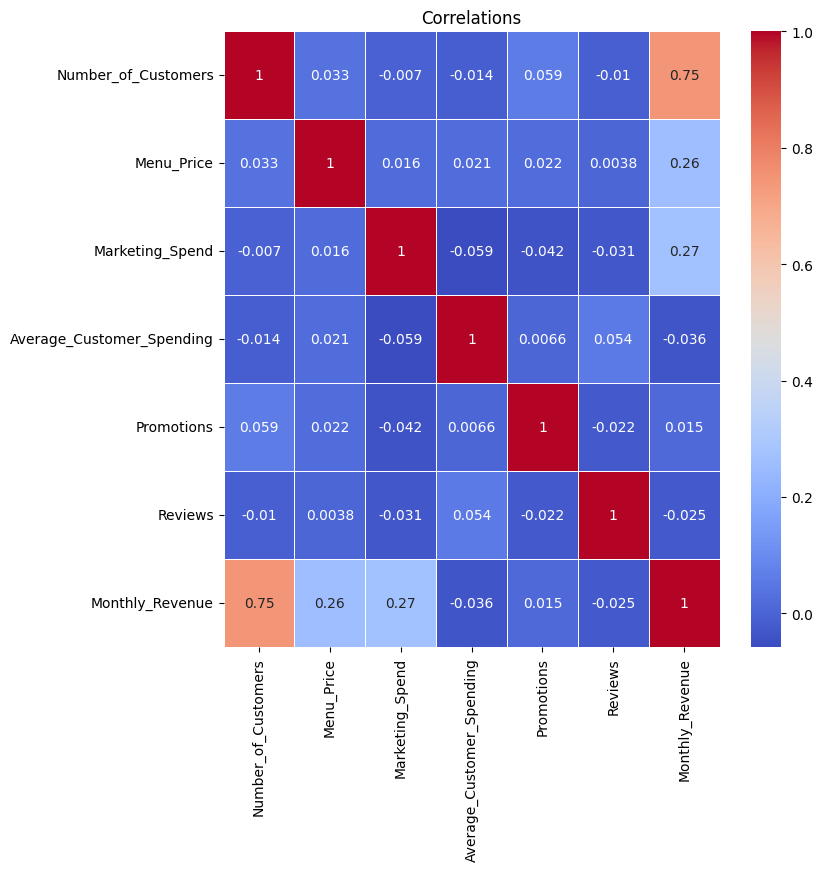

In [11]:
matrix = df_numeric.corr()

plt.figure(figsize=(8,8))
sns.heatmap(matrix, cmap="coolwarm", annot=True, linewidths=0.5)
plt.title("Correlations")
plt.show()

In [12]:
features = matrix['Monthly_Revenue'].sort_values(ascending=False)[1:]

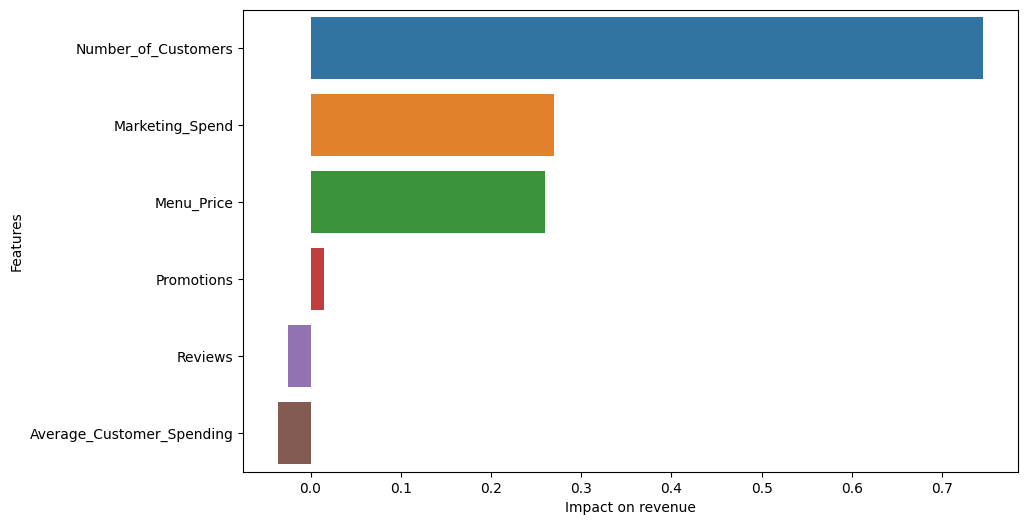

In [13]:
# features.plot(kind= 'barh') 

plt.figure(figsize=(10,6))
sns.barplot(y = features.index, x = features.values, hue = features.index , orient= "h")
plt.xlabel('Impact on revenue')
plt.ylabel('Features')
plt.show()

Here we can conclude that Number Of Customer impact more on Monthly Revune in compare of other features.

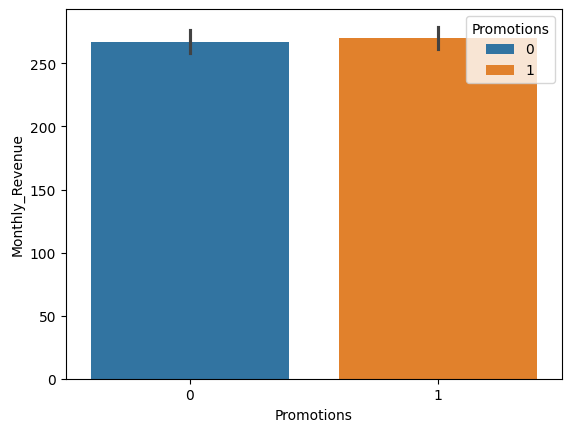

In [14]:
#monthly revenue in respact of promotion 
sns.barplot(x= df.Promotions, y =df.Monthly_Revenue , data = df, hue = "Promotions")
plt.show()

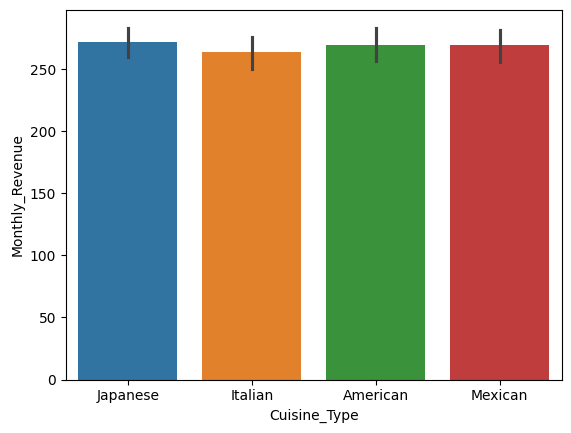

In [15]:
#monthly revenue in respact of Cuisine_Type 
sns.barplot(x= df.Cuisine_Type, y =df.Monthly_Revenue , data = df, hue = "Cuisine_Type")
plt.show()

# Part 5: MODEL BUILDING

## Split in into train test model

In [16]:
#convert categorical column into the numerical colums by oneHotEncoder

dummies = pd.get_dummies(df.Cuisine_Type)

In [17]:
dummies.head()

,American,Italian,Japanese,Mexican
0,False,False,True,False
1,False,True,False,False
2,False,False,True,False
3,False,True,False,False
4,False,True,False,False


In [18]:
df2 = pd.concat([df, dummies], axis=1 )

In [19]:
#drop unneccesory column

df3 = df2.drop(columns=['American', 'Cuisine_Type'])

In [20]:
#separate dependent and independent 

X = df3.drop(columns = ['Monthly_Revenue', 'Promotions', 'Reviews', 'Average_Customer_Spending']) #here we also drop "Promotion" because it will not impact that much on  
y = df3.Monthly_Revenue

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

## Use Linear Regression Model and get the score

In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [24]:
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.7032217296378437

## Use K-Fold for getting multiple score and do cross validation

In [25]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [26]:
cv = ShuffleSplit(
    n_splits=5,
    test_size=0.2,
)
cv

ShuffleSplit(n_splits=5, random_state=None, test_size=0.2, train_size=None)

In [27]:
all_score = cross_val_score(LinearRegression(), X, y, cv = cv)
all_score

array([0.71264415, 0.68263852, 0.72001862, 0.72792571, 0.68654531])

In [28]:
max_score= all_score.max()
min_score= all_score.min()
max_score, min_score

(0.7279257062892494, 0.6826385240476625)

## Use GridCV for getting multiple score and do cross validation

In [29]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


In [30]:
def find_best_model(X,y) :
    algos = {
        "linear_regression" : {
            'model' : LinearRegression(),
            'params' : {
                # 'normalize' :,
                'fit_intercept': [True]
            }
        },
        "lasso" : {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        "decision_tree_regressor" : {
            'model': DecisionTreeRegressor(),
            'params': {
                'max_depth': [None, 10, 20],
                'min_samples_split': [2, 5, 10],
                'criterion' : ["squared_error", "absolute_error", "friedman_mse"]
            }
        },         
        "random_forest_regressor" : {
            'model': RandomForestRegressor(),
            'params': {
                'max_depth': [None, 10, 20],
                'min_samples_split': [2, 5, 10],
                'criterion' : ["squared_error", "absolute_error", "friedman_mse"] 
            }
        }            
    }
    new_score = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        clf = GridSearchCV(config['model'], config['params'], cv=cv)  # Raising errors for clarity
        clf.fit(X, y)
        new_score.append({
            "model": algo_name,
            "best_score": clf.best_score_,
            "best_params": clf.best_params_
        })
    return pd.DataFrame(new_score)
    

In [31]:
find_best_model(X,y).sort_values("best_score", ascending = False)


,model,best_score,best_params
1,lasso,0.670763,"{'alpha': 2, 'selection': 'cyclic'}"
0,linear_regression,0.668101,{'fit_intercept': True}
3,random_forest_regressor,0.648261,"{'criterion': 'absolute_error', 'max_depth': 1..."
2,decision_tree_regressor,0.489423,"{'criterion': 'squared_error', 'max_depth': 10..."


Here we found that lasso model give the best result

In [32]:
X.columns

Index(['Number_of_Customers', 'Menu_Price', 'Marketing_Spend', 'Italian',
       'Japanese', 'Mexican'],
      dtype='object')

In [33]:
lesso_model = Lasso(alpha= 2, selection='random')
lesso_model = lesso_model.fit(X,y)

In [34]:
def predict_price(number_of_customers, menu_price, marketing_spend, cuisine_type):
    loc_index = np.where(X.columns==cuisine_type)[0][0] ##get the column index    
    x = np.zeros(len(X.columns))
    x[0] = number_of_customers 
    x[1] = menu_price 
    x[2] = marketing_spend 

    if loc_index >= 0:
        x[loc_index] = 1

    return lesso_model.predict([x])[0]

In [35]:
predict_price(80, 10, 50, 'Japanese') # price in lakh

C:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


494.9064034290668

# Part 6: MODEL EXPORTING

In [36]:
df3.columns


Index(['Number_of_Customers', 'Menu_Price', 'Marketing_Spend',
       'Average_Customer_Spending', 'Promotions', 'Reviews', 'Monthly_Revenue',
       'Italian', 'Japanese', 'Mexican'],
      dtype='object')

In [37]:
import pickle

In [38]:
with open("predict_restaurent__monthly_revenue", "wb") as f:
    pickle.dump(lesso_model, f)

In [39]:
import json

In [40]:
columns = {
    "data_columns" :  [col.lower() for col in X.columns]
}

In [41]:
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))